# COMP 598 Project 3: Modified Digits
*David Cottrell(david.cottrell2@mail.mcgill.ca), Eric Quinn(eric.quinn@mail.mcgill.ca), Kelley Zhao(kelley.zhao@mail.mcgill.ca)*



## Introduction
We were given a task of categorizing a modified MNIST dataset. To do so we explored different machine learning algorithms (linear regression, SVM, and FFNN). We wished to compare these to the algorithm we expect to outperform all of them, Convoluted Neural Nets.

We explored using prior knowledge of how the dataset was generated to grow our training set into a larger one to improve the CNN's performance.


## Data Pre-processing
We know the Modified Digits dataset is an MNIST with modifications to it, including random rotations. We attempt to exploit this fact by having our learner train not only on the given dataset, but also on random rotations of it.

For our Convolutional Neural Network algorithm, we tested both leaving the data in its original form and creating these new examples by rotating original ones. For each example, we created new examples by rotating it by a random amount, and filling in the triangular gaps from rotation with a reflection of the image. The code below shows an example being rotated a random amount--as you can see the reflection mostly reflects the noise patterns in the original image, giving us a new image example we might expect.

Original:


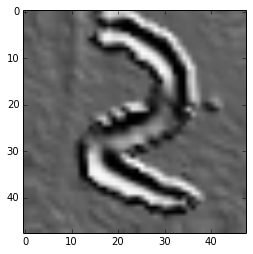

Rotated 274 degrees:


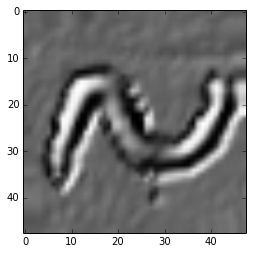

In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import random
import scipy.ndimage as ndimage

# Load image of a 2
img = np.load('img/image2.npy')

# Show original
print "Original:"
plt.imshow(img, cmap="Greys_r")
plt.show()

# Show randomly rotated with reflection
angle = random.randint(1, 359)
print "Rotated " + str(angle) + " degrees:"
rotated = ndimage.interpolation.rotate(img, angle, reshape = False, order = 1, mode = "reflect")
plt.imshow(rotated, cmap="Greys_r")
plt.show()


## Feature Selection
For our first two algorithms, logistic regression and linear SVM, we used PCA to reduce the feature space by half using scikit-learn's implementation[1]. For our neural nets however we do not, since feature selection is built into the weight selections of hidden layers.

## Algorithms
### Logistic Regression
Our first approach to classifying our data was a logistic regression algorithm, using a library from sklearn[1].

### Linear Support Vector Machine
Our second approach was to use an linear SVM to classify the images, using sklearn's LinearSVC from sklearn[1].

### Feedforward Neural Network
Next, we used a fully connected feedforward neural net classifier we implemented from scratch.
** XXXX Kelley This Part Is All Yours XXXX **

### Convolutional Neural Network

One of the best ways currently known to do image recognition is to use a convolutional neural network, which uses convolution kernels in order to identify features in images. The best papers on identifying handwritten digits use convolutional neural networks to do so. [2]

#### Library

We decided to use the PDNN library from Yajie Miao to do our networks. [3 This library allows for use of the CPU or GPU to do the processing, which is useful when moving between authors' computers. In addition, it has setups built in to create convolutional neural networks. This allows for more time to be spent training and working with the data instead of creating the network by hand.

#### Initial CPU Run

We did an initial training using the entirety of the unrotated images given in the data set. In order to use these we fed 70% of the images after shuffling into the convolutional network as a training set and kept 20% back for validation, with 10% at the end as testing. This trained overnight on the CPU, and after running gave a 0-1 error of 17%. When put into Kaggle it performed better, with a 0-1 error of only 16%.

#### Data Splitting and GPU runs

In order to use the GPU that we had available, we had to split our data down into parts to fit into the VRAM. This meant that we could only train on part of our data at a time. PDNN does its training in a certain number of "epochs," meaning that it has run through all the data once. In order to use all our data and not introduce bias by training on one section of data after another, we set up a script that runs through each of our six sections of data twice, and loops through this meta-epoch multiple times. The library allows us to stop training partway through and resume with another training set, which makes this possible. It did require us to edit the library's source code in order to retain the partially completed configuration files and spoof which epoch we had made it to.

We found that after thirty iterations the training error would decrease but the validation error would stay the same. The shell script that runs this is in the auxiliary folder, but is a shell script and won't run in python, so it is not included. Though we split the training set in order to do this training, we kept the validation and test set whole so that we would have an accurate understanding of our error.

Our initial run of this split set used the unrotated images as well in order to compare to the previous section and ensure that there was no loss of precision using this split training style. 

After this initial run, we began adding the rotated data in, also split into sections of the same size. Once the data set was split into the training data set, we shuffle the rotated images into the given data set so no bias would occur. (See Testing and Validation for results).

We found that these rotated images improved our precision, so we increased the number of rotations that we added into our training set. By analysing the amount of time that was taken in order to train on an amount of data, we saw that we could increase the number of our own rotations we tested on by 3 rotations (for a total of five images--one original 4 rotated--per example).


## Hyper-parameter Selection


## Testing and Validation


### Logistic Regression and SVM

We used 4-fold stratified cross validation, splitting the initial data. We train on 3/4 of the data and test on the remaining 1/4 of the data.

The SVM performed, on average in the stratified cross validation stage, 0.3088 accuracy.
![SVM confusion matrix](img/svm-confusionMatrix - 0.3088 accuracy.png)

### FFNN
** XXXX Kelley This Part Is All Yours XXXX **

### Convolutional Neural Network

Before doing any training, we split our data 70/20/10 into a training set, a validation set, and a test set. We never used the test set except after running the training with the validation set. It is only the training set that we added rotated images with.

Because the validation set and test set did not have any images that we rotated oursevles, we made sure that our error would not be biased toward recognizing the images that we had created, which would overfit the model. Instead we have errors that would accurately predict on how we would do with new information, including the Kaggle data set.

With the additional data from adding four new randomly rotated example per example (multiplying our training set size by two), we needed to split into 6 parts to fit into our GPU's VRAM. This yielded **0.829** accuracy on our test set. The confusion matrix appears nicely distributed. Interestingly, it does not appear to have much trouble differentiating 6's from 9's, which we might expect.
![Rotated Once - Six Splits](img/rotatedOnceConfusionMatrix - 0.829 accuracy.png)

We compare this result with an equivalent model without the rotations. We followed the exact same method, splitting the data and training in the same way. This yielded **0.8074** accuracy, meaning our rotations gave us an approximately 2% boost in accuracy! The confusion matrix here looks reasonable as well:
![Unrotated Six Splits](img/unrotated6-splitConfusionMatrix - 0.8074 accuracy.png)

This result confirmed our hypothesis that additional rotated data can improve the learner's performance. Our next step therefore was to grow our dataset once again with rotations, this time multiplying the training set's size by five (adding 4 rotated image per original image). As expected, our accuracy improved to **0.855**. The confusion matrix, once again, appears well distributed:
![Rotated Four - 15 Splits](img/rotatedFourConfusionMatrix - 0.855 Accuracy.png)


## Discussion


## References
[1] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[2] Simard, Patrick, Dave Steinkraus, and John Platt. "Best Practices for Convolutional Neural Networks Applied to Visual Document Analysis." (n.d.): n. pag. Web. Nov. 2015.

[3] Yajie Miao, "Kaldi+PDNN: Building DNN-based ASR Systems with Kaldi and PDNN," arXiv:1401.6984, 2014.
